<a href="https://colab.research.google.com/github/emilziyaev/severstal2022challenge/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import to_datetime
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install neuralprophet[live]

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df_log = df.copy()
df_log['y'] = np.sign(df['Сумма в RUB'])*np.log10(np.abs(df['Сумма в RUB']))

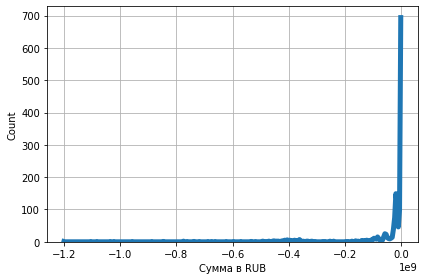

In [ ]:
sns.histplot(df_log['Сумма в RUB'],fill =False,element="poly",cumulative =  False, label = "last",linewidth = 5)
plt.grid('on')
plt.tight_layout()
plt.savefig('normal')

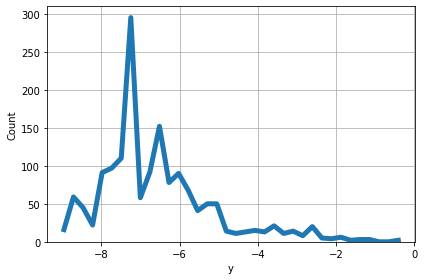

In [ ]:
sns.histplot(df_log['y'],cumulative = False,fill =False,element="poly",label = "Log-scale",linewidth = 5)
plt.grid('on')
plt.tight_layout()
plt.savefig('log')

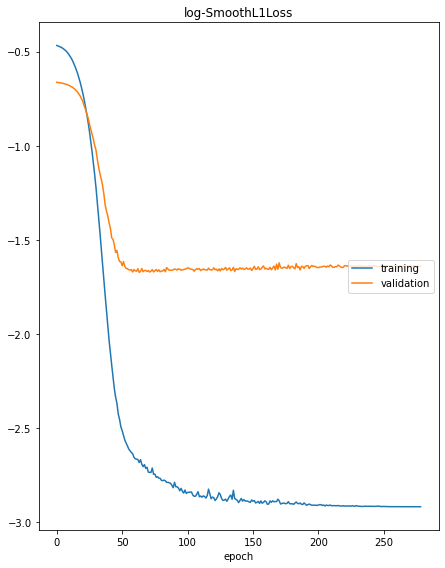

INFO - (NP.df_utils._infer_frequency) - Major frequency W-WED corresponds to 84.211% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-WED corresponds to 84.211% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


log-SmoothL1Loss
	training         	 (min:   -2.920, max:   -0.467, cur:   -2.920)
	validation       	 (min:   -1.674, max:   -0.663, cur:   -1.640)


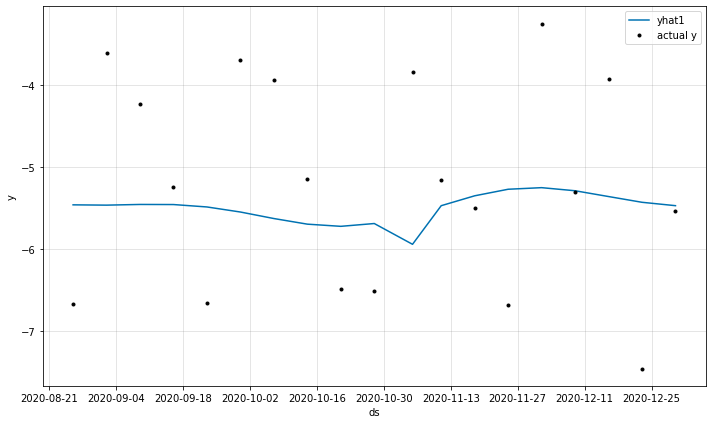

In [ ]:
from neuralprophet import NeuralProphet
for i in range(7):
  df_5 = df_log[df_log['БЕ']==i].copy()
  df_5['ds'] = to_datetime(df_5['Дата транзакции'])
  df_5.drop(columns = ['Сумма в RUB','БЕ','Дата транзакции'],inplace = True)
  df_5.drop_duplicates(subset='ds',inplace = True)
  m = NeuralProphet(learning_rate=0.01)
  df_train, df_test = m.split_df(df_5, freq='W', valid_p = 0.1)
  metrics = m.fit(df_train, freq='W', validation_df=df_test, progress='plot')
  forecast = m.predict(df_test)
  fig = m.plot(forecast)

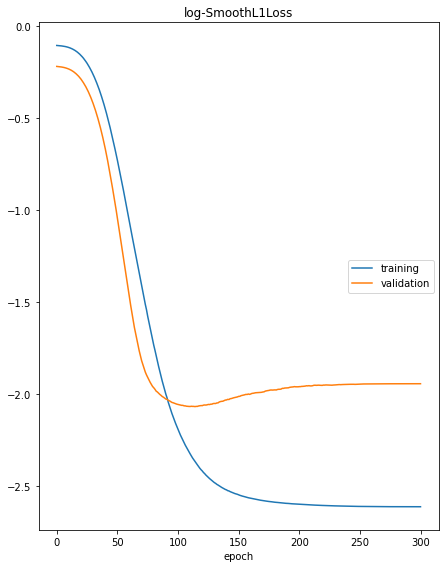

INFO - (NP.df_utils._infer_frequency) - Major frequency W-WED corresponds to 76.471% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-WED corresponds to 76.471% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


log-SmoothL1Loss
	training         	 (min:   -2.613, max:   -0.107, cur:   -2.613)
	validation       	 (min:   -2.069, max:   -0.221, cur:   -1.944)


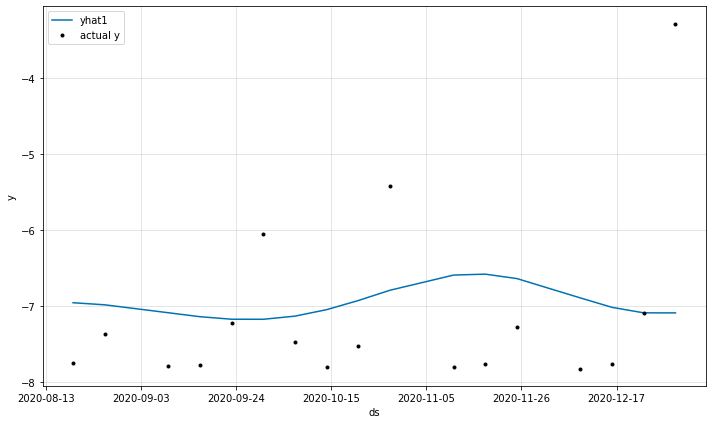

In [ ]:
from neuralprophet import NeuralProphet
for i in range(7):
  df_5 = df_log[df_log['БЕ']==i].copy()
  df_5['ds'] = to_datetime(df_5['Дата транзакции'])
  df_5.drop(columns = ['Сумма в RUB','БЕ','Дата транзакции'],inplace = True)
  df_5.drop_duplicates(subset='ds',inplace = True)
  m = NeuralProphet(learning_rate=0.001)
  df_train, df_test = m.split_df(df_5, freq='W', valid_p = 0.1)
  metrics = m.fit(df_train, freq='W', validation_df=df_test, progress='plot')
  forecast = m.predict(df_test)
  fig = m.plot(forecast)

In [ ]:
df_test

,y,ds
0,-7.770176,2020-09-16
1,-7.226384,2020-09-23
2,-6.059037,2020-09-30
3,-7.478117,2020-10-07
4,-7.797502,2020-10-14
5,-7.527577,2020-10-21
6,-5.425387,2020-10-28
7,-7.803319,2020-11-11
8,-7.760779,2020-11-18
9,-7.276497,2020-11-25


INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-THU corresponds to 80.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


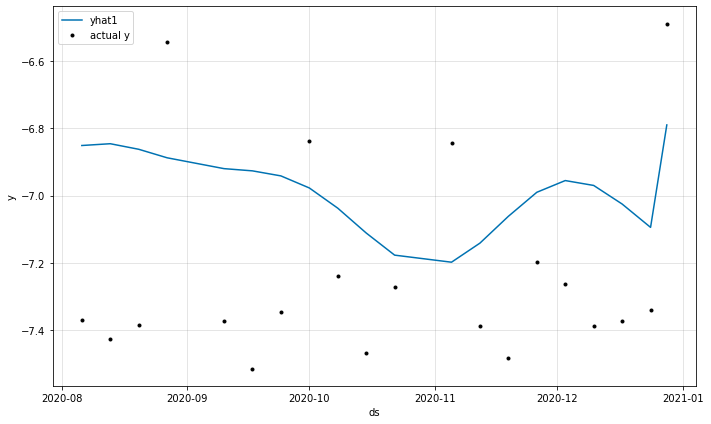

In [ ]:
forecast = m.predict(df_test)
fig = m.plot(forecast)

In [ ]:
forecast

In [ ]:
dates = pd.DataFrame([pd.Timestamp('2020-12-30'), 
                  pd.Timestamp('2021-03-31')]).set_index(0)
#s = pd.Series([np.nan, np.nan], dates)
#s = pd.DataFrame(s)

In [ ]:
future = pd.DataFrame([])
future['ds'] = dates.asfreq('W').reset_index()
future['y'] = 0 

In [ ]:
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2020-08-19,-7.745781,-6.957095,0.788686,-6.205176,0.085575,-0.837494
1,2020-08-26,-7.374713,-6.984431,0.390282,-6.195272,0.048335,-0.837494
2,2020-09-09,-7.794556,-7.088556,0.706000,-6.175466,-0.075597,-0.837494
3,2020-09-16,-7.770176,-7.140821,0.629356,-6.165562,-0.137765,-0.837494
4,2020-09-23,-7.226384,-7.174147,0.052237,-6.155659,-0.180995,-0.837494
5,2020-09-30,-6.059037,-7.174898,-1.115861,-6.145755,-0.191649,-0.837494
6,2020-10-07,-7.478117,-7.133466,0.344651,-6.135851,-0.160121,-0.837494
7,2020-10-14,-7.797502,-7.048005,0.749497,-6.125948,-0.084564,-0.837494
8,2020-10-21,-7.527577,-6.927480,0.600097,-6.116045,0.026058,-0.837494
9,2020-10-28,-5.425387,-6.792267,-1.366880,-6.106141,0.151367,-0.837494


INFO - (NP.df_utils._infer_frequency) - Major frequency W-WED corresponds to 76.471% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-WED corresponds to 76.471% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


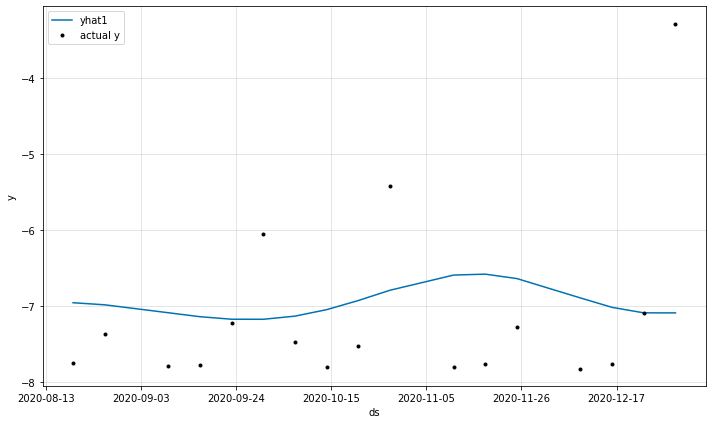

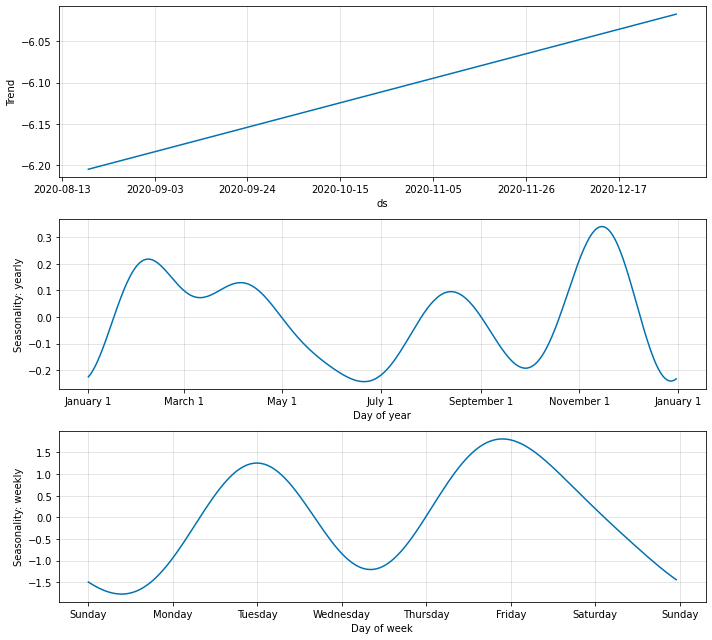

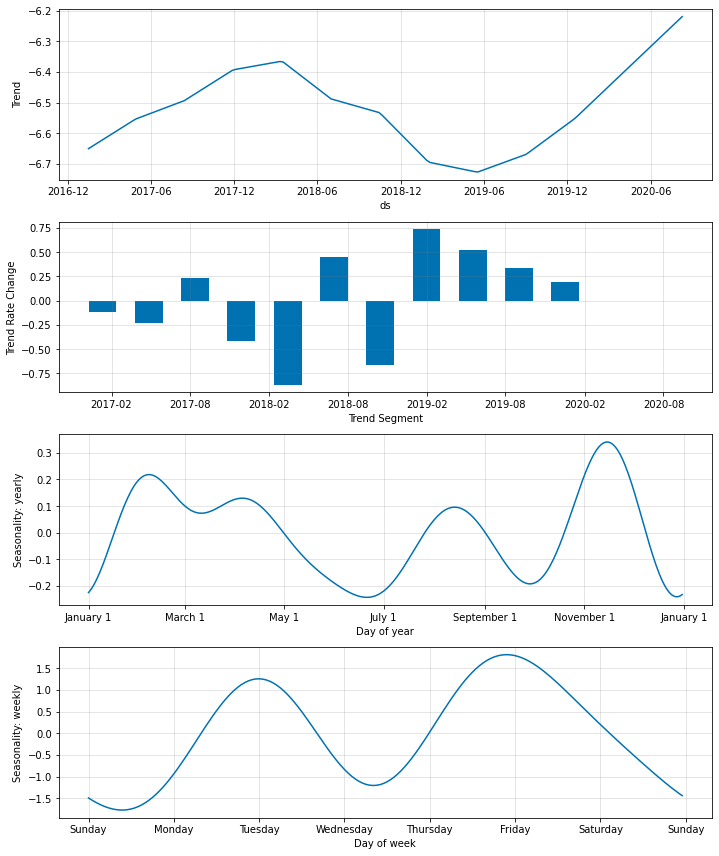

In [ ]:
# create forecast
forecast = m.predict(df_test)# create plots
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()